In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


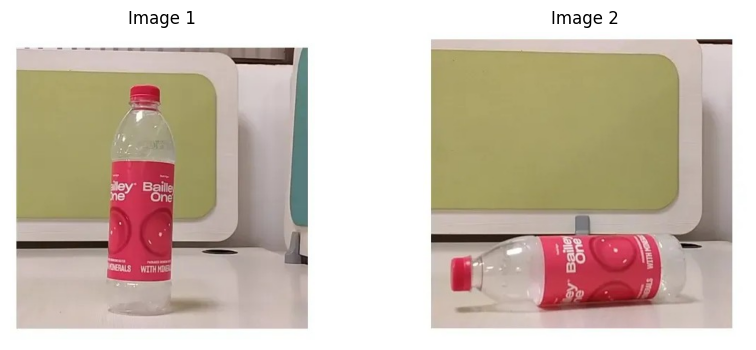

In [2]:
img1 = cv2.imread('b2.jpg')   # upright bottle
img2 = cv2.imread('b3.jpg')   # lying bottle

if img1 is None or img2 is None:
    raise IOError("Images not found or failed to load")

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Image 1")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Image 2")
plt.axis("off")
plt.show()


SIFT Feature Detection

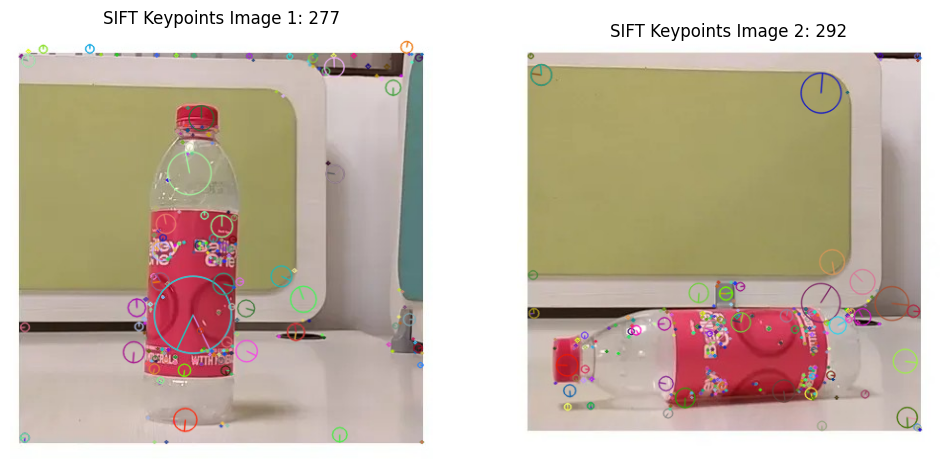

In [3]:
sift = cv2.SIFT_create(nfeatures=1000)

kp1_sift, des1_sift = sift.detectAndCompute(gray1, None)
kp2_sift, des2_sift = sift.detectAndCompute(gray2, None)

img1_sift = cv2.drawKeypoints(
    img1, kp1_sift, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

img2_sift = cv2.drawKeypoints(
    img2, kp2_sift, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1_sift, cv2.COLOR_BGR2RGB))
plt.title(f"SIFT Keypoints Image 1: {len(kp1_sift)}")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2_sift, cv2.COLOR_BGR2RGB))
plt.title(f"SIFT Keypoints Image 2: {len(kp2_sift)}")
plt.axis("off")
plt.show()


ORB Feature Detection

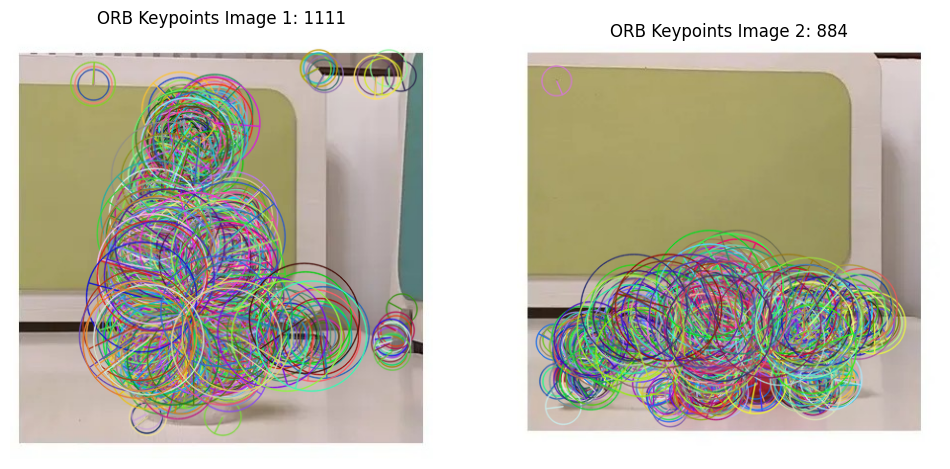

In [4]:
orb = cv2.ORB_create(nfeatures=1500)

kp1_orb, des1_orb = orb.detectAndCompute(gray1, None)
kp2_orb, des2_orb = orb.detectAndCompute(gray2, None)

img1_orb = cv2.drawKeypoints(
    img1, kp1_orb, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

img2_orb = cv2.drawKeypoints(
    img2, kp2_orb, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1_orb, cv2.COLOR_BGR2RGB))
plt.title(f"ORB Keypoints Image 1: {len(kp1_orb)}")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2_orb, cv2.COLOR_BGR2RGB))
plt.title(f"ORB Keypoints Image 2: {len(kp2_orb)}")
plt.axis("off")
plt.show()


SIFT Feature Matching (BFMatcher + Ratio Test)

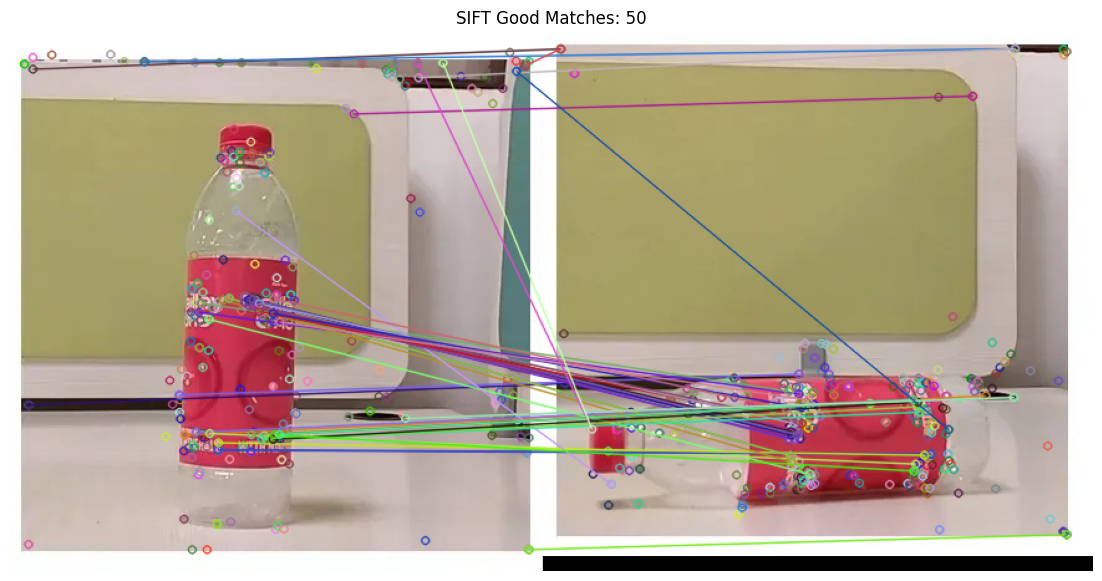

In [5]:
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

matches_sift = bf_sift.knnMatch(des1_sift, des2_sift, k=2)

good_matches_sift = []
for m, n in matches_sift:
    if m.distance < 0.75 * n.distance:
        good_matches_sift.append(m)

img_matches_sift = cv2.drawMatches(
    img1, kp1_sift,
    img2, kp2_sift,
    good_matches_sift[:50],
    None,
    flags=cv2.DrawMatchesFlags_DEFAULT
)

plt.figure(figsize=(18,7))
plt.imshow(cv2.cvtColor(img_matches_sift, cv2.COLOR_BGR2RGB))
plt.title(f"SIFT Good Matches: {len(good_matches_sift)}")
plt.axis("off")
plt.show()


ORB Feature Matching (BFMatcher + Ratio Test)

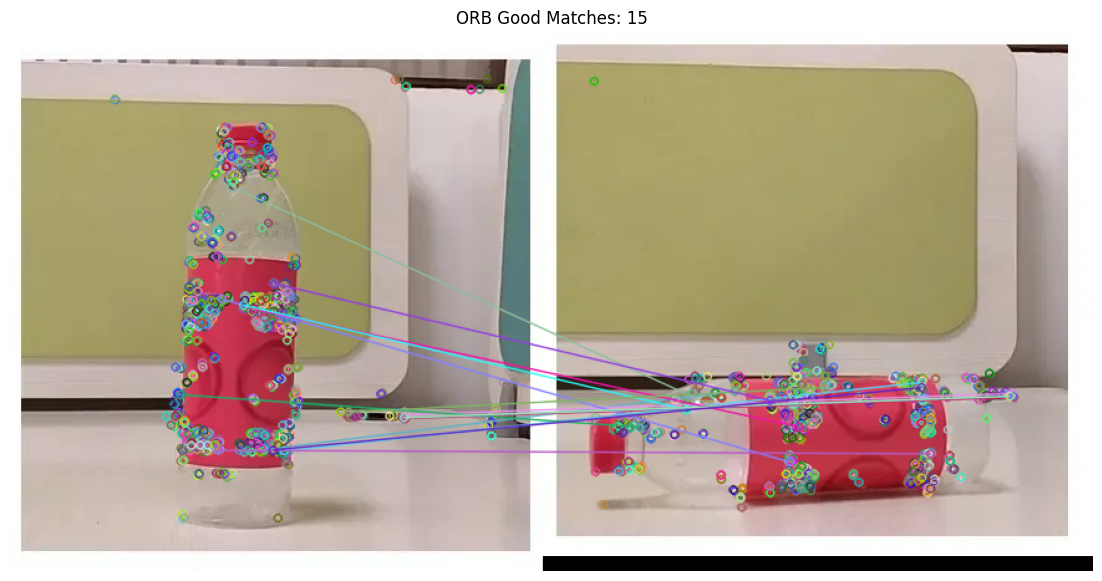

In [6]:
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

matches_orb = bf_orb.knnMatch(des1_orb, des2_orb, k=2)

good_matches_orb = []
for m, n in matches_orb:
    if m.distance < 0.75 * n.distance:
        good_matches_orb.append(m)

img_matches_orb = cv2.drawMatches(
    img1, kp1_orb,
    img2, kp2_orb,
    good_matches_orb[:50],
    None,
    flags=cv2.DrawMatchesFlags_DEFAULT
)

plt.figure(figsize=(18,7))
plt.imshow(cv2.cvtColor(img_matches_orb, cv2.COLOR_BGR2RGB))
plt.title(f"ORB Good Matches: {len(good_matches_orb)}")
plt.axis("off")
plt.show()


Comparison

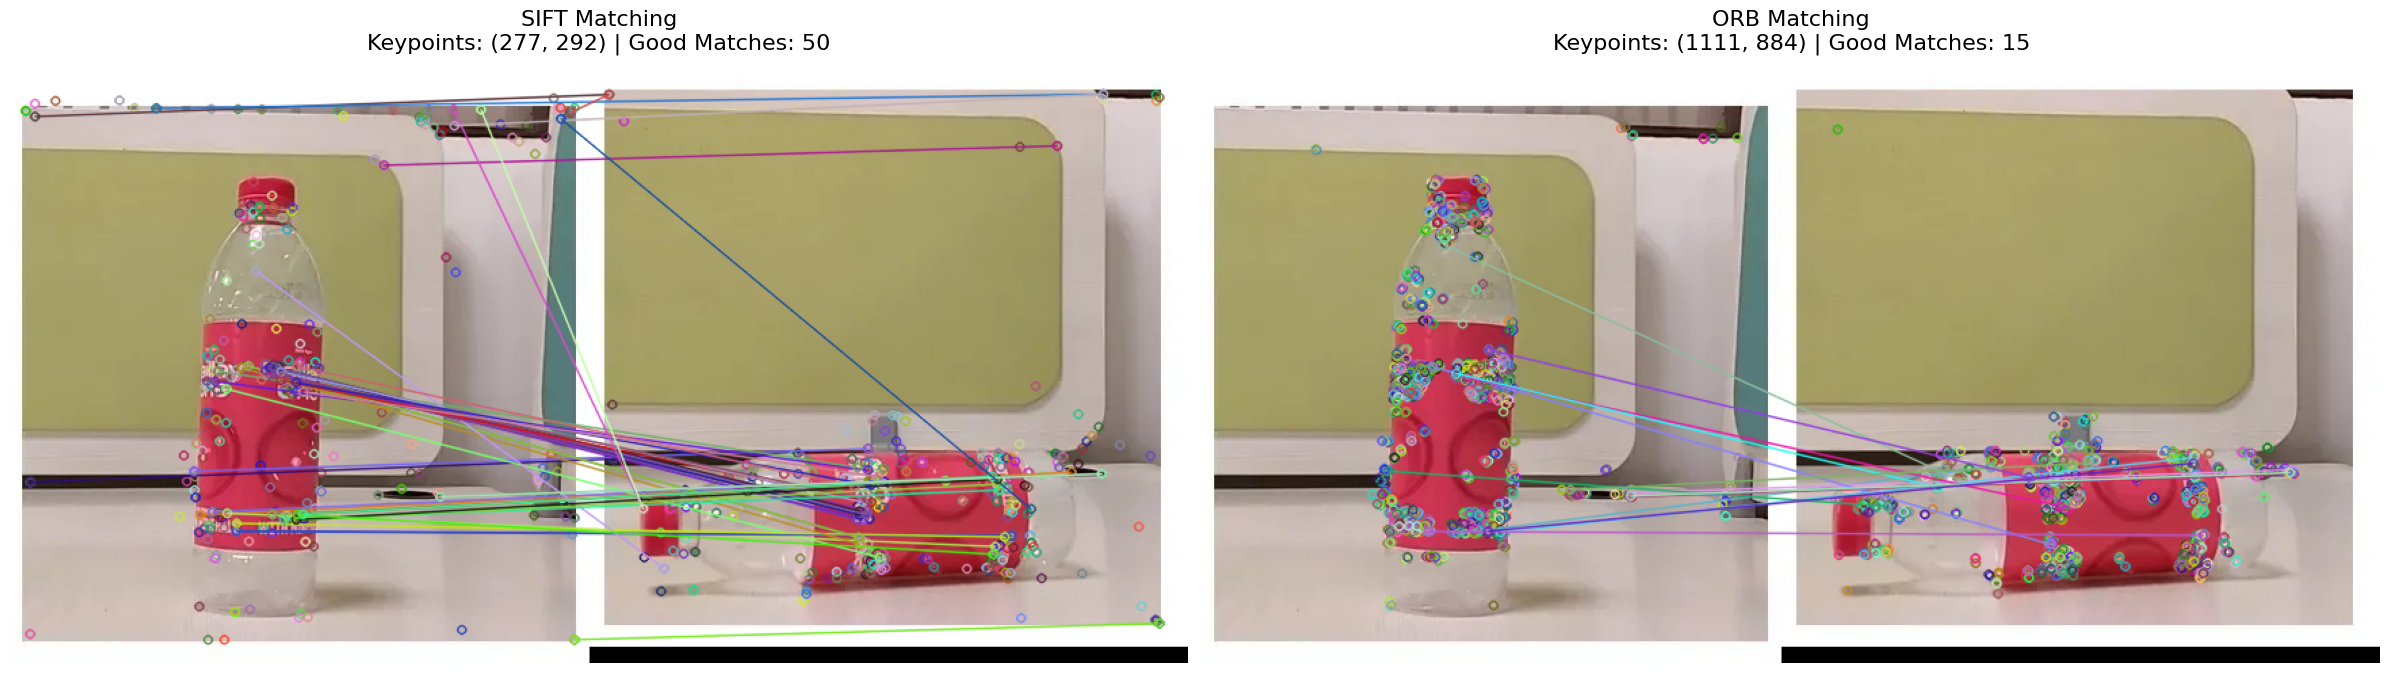

In [9]:
fig = plt.figure(figsize=(24, 10))

# --- SIFT ---
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cv2.cvtColor(img_matches_sift, cv2.COLOR_BGR2RGB))
ax1.set_title(
    f"SIFT Matching\nKeypoints: ({len(kp1_sift)}, {len(kp2_sift)}) | Good Matches: {len(good_matches_sift)}",
    fontsize=16,
    pad=20
)
ax1.axis("off")

# --- ORB ---
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(cv2.cvtColor(img_matches_orb, cv2.COLOR_BGR2RGB))
ax2.set_title(
    f"ORB Matching\nKeypoints: ({len(kp1_orb)}, {len(kp2_orb)}) | Good Matches: {len(good_matches_orb)}",
    fontsize=16,
    pad=20
)
ax2.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
